In [1]:
#K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression.
#it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.
#training error is low test error is high at lower K values. This is called overfitting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [2]:
from pandas import read_csv

In [3]:
Zoo = read_csv('Zoo.csv')
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
Zoo['animal name'].unique().size

100

In [11]:
X=Zoo.iloc[:,0:17]
Y=Zoo['type']
X

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [13]:
Y.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [14]:
from sklearn import preprocessing

In [15]:
#Convert the categorical strings to numerics
label_encoder = preprocessing.LabelEncoder()
X['animal name']= label_encoder.fit_transform(X['animal name']) 
X

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [17]:
#Making whole data into one format
sc= StandardScaler()
sc.fit(x_train)
X_train= sc.transform(x_train)
X_train

array([[ 0.38556241, -0.90453403, -0.5       , ...,  0.59660054,
        -0.42008403, -0.95118973],
       [-1.66605408,  1.1055416 , -0.5       , ..., -1.67616342,
        -0.42008403,  1.05131497],
       [ 0.70391669, -0.90453403,  2.        , ...,  0.59660054,
        -0.42008403,  1.05131497],
       ...,
       [ 0.4563078 ,  1.1055416 , -0.5       , ...,  0.59660054,
        -0.42008403,  1.05131497],
       [-0.14502806,  1.1055416 , -0.5       , ...,  0.59660054,
        -0.42008403,  1.05131497],
       [-0.25114616,  1.1055416 , -0.5       , ...,  0.59660054,
        -0.42008403,  1.05131497]])

In [18]:
sc.fit(x_test)
X_test= sc.transform(x_test)
X_test

array([[-0.68703815, -0.70710678, -0.48507125,  0.70710678, -0.70710678,
        -0.63245553,  1.04880885,  0.95346259,  0.78446454,  0.48507125,
         0.70710678,  3.082207  , -0.63245553,  0.6384424 , -1.78885438,
        -0.2236068 , -0.63245553],
       [ 1.27148689, -0.70710678, -0.48507125,  0.70710678, -0.70710678,
        -0.63245553,  1.04880885,  0.95346259,  0.78446454,  0.48507125,
        -1.41421356,  3.082207  ,  1.58113883, -1.14919632,  0.55901699,
        -0.2236068 ,  1.58113883],
       [-1.43780608, -0.70710678, -0.48507125,  0.70710678, -0.70710678,
        -0.63245553,  1.04880885,  0.95346259,  0.78446454,  0.48507125,
        -1.41421356, -0.32444284,  1.58113883, -1.14919632,  0.55901699,
        -0.2236068 , -0.63245553],
       [ 0.25958229,  1.41421356, -0.48507125, -1.41421356,  1.41421356,
        -0.63245553, -0.95346259, -1.04880885,  0.78446454,  0.48507125,
         0.70710678, -0.32444284, -0.63245553,  0.6384424 ,  0.55901699,
        -0.2236068 

In [19]:
X.shape

(101, 17)

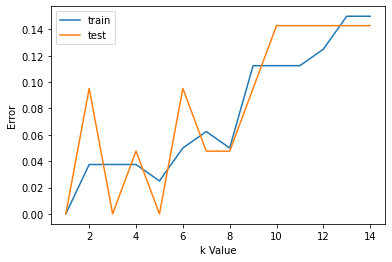

In [20]:
# choosing the K value, we use error curves and K value with optimal variance, and bias error is chosen as K value for prediction purposes.  
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

# Let us consider k value to be 5 from above error graph

In [21]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0

In [22]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0

In [23]:
knn= KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9523809523809523

# n_neighbors for 5 and 3 we get high accuracy

# Grid Search for Algorithm Tuning

In [24]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
Zoo = read_csv('Zoo.csv')
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [26]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [27]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [28]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [29]:
X

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [31]:
sc= StandardScaler()
sc.fit(X)
X_stnd= sc.transform(X)
X_stnd

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [32]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_stnd, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [33]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 1}


In [ ]:
#According to Grid search algorithm k value to be 1

# Visualizing the CV results

In [35]:
from sklearn.model_selection import cross_val_score

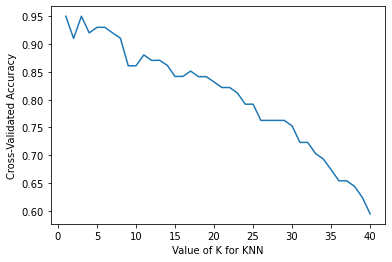

In [37]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_stnd, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#According to above graph k value is good for 1 or 4